In [2]:
import tensorflow as tf
import tensorboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL
from random import sample, seed

Data Loading Section

In [16]:
#Data Loading

df = pd.read_csv("birds.csv")

In [3]:
df.head()

,class id,filepaths,labels,data set,scientific name
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [17]:
#To use the 200 class variant, uncomment the seed and df = df[df["class id"].isin(used_class_ids)] lines to have the datasets contain only 200 classes

#seed(123)
number_of_clases = 200
class_ids = list(df["class id"].unique())
used_class_ids = sample(class_ids, 200)
#df = df[df["class id"].isin(used_class_ids)]
train_df = df[df['data set'] == "train"]
val_df = df[df['data set'] == "valid"]
test_df = df[df['data set'] == "test"]
train_df

,class id,filepaths,labels,data set,scientific name
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
...,...,...,...,...,...
82719,514,train/ZEBRA DOVE/95.jpg,ZEBRA DOVE,train,GEOPELIA STRIATA
82720,514,train/ZEBRA DOVE/96.jpg,ZEBRA DOVE,train,GEOPELIA STRIATA
82721,514,train/ZEBRA DOVE/97.jpg,ZEBRA DOVE,train,GEOPELIA STRIATA
82722,514,train/ZEBRA DOVE/98.jpg,ZEBRA DOVE,train,GEOPELIA STRIATA


In [91]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

batch_size = 256
seed = 123
target_size = (64,64)

train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    color_mode='grayscale',
    class_mode='categorical',
    target_size=target_size,
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    subset='training'
)

val_images = generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    color_mode='grayscale',
    class_mode='categorical',
    target_size=target_size,
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    subset='training'
)

test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    color_mode='grayscale',
    class_mode='categorical',
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False
)

Found 82724 validated image filenames belonging to 515 classes.
Found 2575 validated image filenames belonging to 515 classes.
Found 2575 validated image filenames belonging to 515 classes.


In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

batch_size = 256
seed = 123
target_size = (64,64)

train_images_rgb = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    color_mode='rgb',
    class_mode='categorical',
    target_size=target_size,
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    subset='training'
)

val_images_rgb = generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    color_mode='rgb',
    class_mode='categorical',
    target_size=target_size,
    batch_size=batch_size,
    shuffle=True,
    seed=seed,
    subset='training'
)

test_images_rgb = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    color_mode='rgb',
    class_mode='categorical',
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False
)

Found 82724 validated image filenames belonging to 515 classes.
Found 2575 validated image filenames belonging to 515 classes.
Found 2575 validated image filenames belonging to 515 classes.


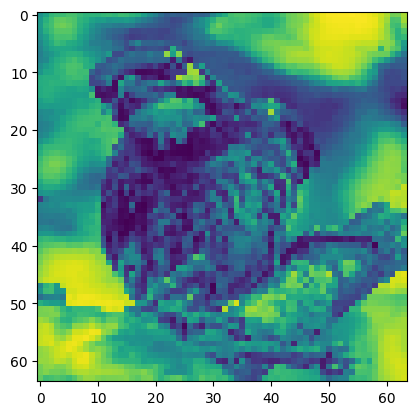

In [92]:
plt.imshow(train_images.next()[0][0].astype("uint8"))

Model Creation

200 class 2D CNN

In [66]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3), padding = "same", strides = (2), activation="relu", input_shape = (64,64, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3), padding = "valid", strides = (2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3), padding = "same", strides = (2), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3), padding = "valid", strides = (2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(200, activation = "softmax"))

model.build()

optimizer = tf.optimizers.Adam(learning_rate = 0.0001)
loss_fn = tf.losses.CategoricalCrossentropy()
acc_fn = tf.metrics.CategoricalAccuracy()
ckpt_path = "ckpt/checkpoint/2D_200_class"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path)
model.compile(optimizer, loss_fn, metrics = [acc_fn])

515 class 2D CNN

In [57]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3), padding = "same", strides = (2), activation="relu", input_shape = (64,64, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3), padding = "valid", strides = (2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3), padding = "same", strides = (2), activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3), padding = "valid", strides = (2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(515, activation = "softmax"))

model.build()

optimizer = tf.optimizers.Adam(learning_rate = 0.0001)
loss_fn = tf.losses.CategoricalCrossentropy()
acc_fn = tf.metrics.CategoricalAccuracy()
ckpt_path = "ckpt/checkpoint/2D_515_class"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path)
model.compile(optimizer, loss_fn, metrics = [acc_fn])

200 class 3D CNN

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((-1, 64, 64, 3), name = "reshape", input_shape = (64,64,3)))
model.add(tf.keras.layers.Conv3D(filters=32, kernel_size=(3), padding = "same", strides = (2), activation="relu", name = "conv1"))
model.add(tf.keras.layers.MaxPool3D(pool_size=(3), padding = "same", strides = (2), name = "pool1"))
model.add(tf.keras.layers.Conv3D(filters=64, kernel_size=(3), padding = "same", strides = (2), activation="relu", name = "conv2"))
model.add(tf.keras.layers.MaxPool3D(pool_size=(3), padding = "same", strides = (2), name = "pool2"))
model.add(tf.keras.layers.Flatten(name = "flat"))
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "dense1"))
model.add(tf.keras.layers.Dense(200, activation = "softmax", name = "dense3"))

model.build()

optimizer = tf.optimizers.Adam()
loss_fn = tf.losses.CategoricalCrossentropy()
acc_fn = tf.metrics.CategoricalAccuracy()
ckpt_path = "ckpt/checkpoint/3D_200_class"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path)
model.compile(optimizer, loss_fn, metrics = [acc_fn])

515 class 3D CNN

In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Reshape((-1, 64, 64, 3), name = "reshape", input_shape = (64,64,3)))
model.add(tf.keras.layers.Conv3D(filters=32, kernel_size=(3), padding = "same", strides = (2), activation="relu", name = "conv1"))
model.add(tf.keras.layers.MaxPool3D(pool_size=(3), padding = "same", strides = (2), name = "pool1"))
model.add(tf.keras.layers.Conv3D(filters=64, kernel_size=(3), padding = "same", strides = (2), activation="relu", name = "conv2"))
model.add(tf.keras.layers.MaxPool3D(pool_size=(3), padding = "same", strides = (2), name = "pool2"))
model.add(tf.keras.layers.Flatten(name = "flat"))
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "dense1"))
model.add(tf.keras.layers.Dense(515, activation = "softmax", name = "dense3"))

model.build()

optimizer = tf.optimizers.Adam()
loss_fn = tf.losses.CategoricalCrossentropy()
acc_fn = tf.metrics.CategoricalAccuracy()
ckpt_path = "ckpt/checkpoint/3D_515_class"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path)
model.compile(optimizer, loss_fn, metrics = [acc_fn])
model.build()

In [67]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_8 (Dense)             (None, 100)             

Model Training

In [152]:
mobileNet_base = tf.keras.applications.ResNetRS101(input_shape=(64, 64, 3),
                                               include_top=False,
                                               weights='imagenet')

mobileNet_base.trainable = False

ins = tf.keras.Input(shape=(64,64,3))
ins = tf.keras.applications.resnet50.preprocess_input(ins)
x = mobileNet_base(ins)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(100, activation="relu")(x)
predictor_head = tf.keras.layers.Dense(515, activation="softmax")(x)

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.0001)
ckpt_path = "ckpt/checkpoint/ResNet101_transfer_64_64"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path)
transfer_model = tf.keras.Model(inputs=ins, outputs = predictor_head)
transfer_model.compile(optimizer, loss_fn, metrics = [acc_fn])
transfer_model.summary()

247817848/247817848 [==============================] - 9s 0us/step
Model: "model_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_88 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 resnet-rs-101 (Functional)  (None, 2, 2, 2048)        61675296  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_73 (Dense)            (None, 100)               204900    
                                                                 
 dense_74 (Dense)            (None, 515)               52015     
                                                                 
Total params: 61,932,211
Trainable params: 256,915
Non-tr

In [68]:
#Train the models

model.fit(train_images, epochs=30, validation_data= val_images, callbacks=[checkpoint])
#augmentedDataModel.fit(x=x_train_aug, y=y_train_aug, batch_size=512, epochs=5)

Epoch 1/30
126/126 [==============================] - ETA: 0s - loss: 8.6099 - categorical_accuracy: 0.0052

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 50s 391ms/step - loss: 8.6099 - categorical_accuracy: 0.0052 - val_loss: 5.3100 - val_categorical_accuracy: 0.0080
Epoch 2/30
126/126 [==============================] - ETA: 0s - loss: 5.3060 - categorical_accuracy: 0.0065

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 46s 365ms/step - loss: 5.3060 - categorical_accuracy: 0.0065 - val_loss: 5.3032 - val_categorical_accuracy: 0.0080
Epoch 3/30
126/126 [==============================] - ETA: 0s - loss: 5.2996 - categorical_accuracy: 0.0075

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 47s 370ms/step - loss: 5.2996 - categorical_accuracy: 0.0075 - val_loss: 5.3012 - val_categorical_accuracy: 0.0090
Epoch 4/30
126/126 [==============================] - ETA: 0s - loss: 5.2948 - categorical_accuracy: 0.0101

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 46s 363ms/step - loss: 5.2948 - categorical_accuracy: 0.0101 - val_loss: 5.2986 - val_categorical_accuracy: 0.0100
Epoch 5/30
126/126 [==============================] - ETA: 0s - loss: 5.2878 - categorical_accuracy: 0.0112

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 44s 345ms/step - loss: 5.2878 - categorical_accuracy: 0.0112 - val_loss: 5.2854 - val_categorical_accuracy: 0.0080
Epoch 6/30
126/126 [==============================] - ETA: 0s - loss: 5.2717 - categorical_accuracy: 0.0131

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 44s 351ms/step - loss: 5.2717 - categorical_accuracy: 0.0131 - val_loss: 5.2651 - val_categorical_accuracy: 0.0120
Epoch 7/30
126/126 [==============================] - ETA: 0s - loss: 5.2478 - categorical_accuracy: 0.0148

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 44s 352ms/step - loss: 5.2478 - categorical_accuracy: 0.0148 - val_loss: 5.2459 - val_categorical_accuracy: 0.0150
Epoch 8/30
126/126 [==============================] - ETA: 0s - loss: 5.2223 - categorical_accuracy: 0.0149

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 46s 365ms/step - loss: 5.2223 - categorical_accuracy: 0.0149 - val_loss: 5.2153 - val_categorical_accuracy: 0.0120
Epoch 9/30
126/126 [==============================] - ETA: 0s - loss: 5.1930 - categorical_accuracy: 0.0154

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 46s 363ms/step - loss: 5.1930 - categorical_accuracy: 0.0154 - val_loss: 5.1931 - val_categorical_accuracy: 0.0120
Epoch 10/30
126/126 [==============================] - ETA: 0s - loss: 5.1664 - categorical_accuracy: 0.0154

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 47s 373ms/step - loss: 5.1664 - categorical_accuracy: 0.0154 - val_loss: 5.1674 - val_categorical_accuracy: 0.0140
Epoch 11/30
126/126 [==============================] - ETA: 0s - loss: 5.1396 - categorical_accuracy: 0.0167

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 46s 362ms/step - loss: 5.1396 - categorical_accuracy: 0.0167 - val_loss: 5.1431 - val_categorical_accuracy: 0.0180
Epoch 12/30
126/126 [==============================] - ETA: 0s - loss: 5.1163 - categorical_accuracy: 0.0203

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 47s 372ms/step - loss: 5.1163 - categorical_accuracy: 0.0203 - val_loss: 5.1170 - val_categorical_accuracy: 0.0160
Epoch 13/30
126/126 [==============================] - ETA: 0s - loss: 5.0896 - categorical_accuracy: 0.0224

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 47s 373ms/step - loss: 5.0896 - categorical_accuracy: 0.0224 - val_loss: 5.1025 - val_categorical_accuracy: 0.0170
Epoch 14/30
126/126 [==============================] - ETA: 0s - loss: 5.0672 - categorical_accuracy: 0.0233

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 46s 362ms/step - loss: 5.0672 - categorical_accuracy: 0.0233 - val_loss: 5.0783 - val_categorical_accuracy: 0.0220
Epoch 15/30
126/126 [==============================] - ETA: 0s - loss: 5.0393 - categorical_accuracy: 0.0256

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 43s 340ms/step - loss: 5.0393 - categorical_accuracy: 0.0256 - val_loss: 5.0524 - val_categorical_accuracy: 0.0190
Epoch 16/30
126/126 [==============================] - ETA: 0s - loss: 5.0134 - categorical_accuracy: 0.0275

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 44s 352ms/step - loss: 5.0134 - categorical_accuracy: 0.0275 - val_loss: 5.0319 - val_categorical_accuracy: 0.0200
Epoch 17/30
126/126 [==============================] - ETA: 0s - loss: 4.9848 - categorical_accuracy: 0.0292

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 46s 362ms/step - loss: 4.9848 - categorical_accuracy: 0.0292 - val_loss: 5.0029 - val_categorical_accuracy: 0.0260
Epoch 18/30
126/126 [==============================] - ETA: 0s - loss: 4.9565 - categorical_accuracy: 0.0323

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 46s 361ms/step - loss: 4.9565 - categorical_accuracy: 0.0323 - val_loss: 4.9918 - val_categorical_accuracy: 0.0230
Epoch 19/30
126/126 [==============================] - ETA: 0s - loss: 4.9227 - categorical_accuracy: 0.0369

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 47s 373ms/step - loss: 4.9227 - categorical_accuracy: 0.0369 - val_loss: 4.9657 - val_categorical_accuracy: 0.0260
Epoch 20/30
126/126 [==============================] - ETA: 0s - loss: 4.8851 - categorical_accuracy: 0.0425

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 47s 372ms/step - loss: 4.8851 - categorical_accuracy: 0.0425 - val_loss: 4.9192 - val_categorical_accuracy: 0.0390
Epoch 21/30
126/126 [==============================] - ETA: 0s - loss: 4.8446 - categorical_accuracy: 0.0460

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 46s 363ms/step - loss: 4.8446 - categorical_accuracy: 0.0460 - val_loss: 4.8649 - val_categorical_accuracy: 0.0380
Epoch 22/30
126/126 [==============================] - ETA: 0s - loss: 4.8027 - categorical_accuracy: 0.0494

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 45s 357ms/step - loss: 4.8027 - categorical_accuracy: 0.0494 - val_loss: 4.8543 - val_categorical_accuracy: 0.0390
Epoch 23/30
126/126 [==============================] - ETA: 0s - loss: 4.7507 - categorical_accuracy: 0.0523

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 45s 355ms/step - loss: 4.7507 - categorical_accuracy: 0.0523 - val_loss: 4.7950 - val_categorical_accuracy: 0.0450
Epoch 24/30
126/126 [==============================] - ETA: 0s - loss: 4.7029 - categorical_accuracy: 0.0555

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 45s 355ms/step - loss: 4.7029 - categorical_accuracy: 0.0555 - val_loss: 4.7695 - val_categorical_accuracy: 0.0430
Epoch 25/30
126/126 [==============================] - ETA: 0s - loss: 4.6511 - categorical_accuracy: 0.0600

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 45s 360ms/step - loss: 4.6511 - categorical_accuracy: 0.0600 - val_loss: 4.7053 - val_categorical_accuracy: 0.0480
Epoch 26/30
126/126 [==============================] - ETA: 0s - loss: 4.6000 - categorical_accuracy: 0.0637

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 44s 351ms/step - loss: 4.6000 - categorical_accuracy: 0.0637 - val_loss: 4.6529 - val_categorical_accuracy: 0.0510
Epoch 27/30
126/126 [==============================] - ETA: 0s - loss: 4.5463 - categorical_accuracy: 0.0696

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 43s 343ms/step - loss: 4.5463 - categorical_accuracy: 0.0696 - val_loss: 4.6022 - val_categorical_accuracy: 0.0520
Epoch 28/30
126/126 [==============================] - ETA: 0s - loss: 4.4938 - categorical_accuracy: 0.0753

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 46s 366ms/step - loss: 4.4938 - categorical_accuracy: 0.0753 - val_loss: 4.5700 - val_categorical_accuracy: 0.0630
Epoch 29/30
126/126 [==============================] - ETA: 0s - loss: 4.4452 - categorical_accuracy: 0.0815

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 47s 374ms/step - loss: 4.4452 - categorical_accuracy: 0.0815 - val_loss: 4.5315 - val_categorical_accuracy: 0.0680
Epoch 30/30
126/126 [==============================] - ETA: 0s - loss: 4.3960 - categorical_accuracy: 0.0862

INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\2D_200_class\assets


126/126 [==============================] - 48s 376ms/step - loss: 4.3960 - categorical_accuracy: 0.0862 - val_loss: 4.5077 - val_categorical_accuracy: 0.0650


Test the model

In [69]:
loss, acc = model.evaluate(test_images)
model.evaluate(test_images)

4/4 [==============================] - 1s 325ms/step - loss: 4.4873 - categorical_accuracy: 0.0810


[4.487293720245361, 0.08100000023841858]

In [70]:
model.save("Models/2D_200_class")

INFO:tensorflow:Assets written to: Models/2D_200_class\assets


INFO:tensorflow:Assets written to: Models/2D_200_class\assets


Show the model Results

In [3]:
loaded_model = tf.keras.models.load_model("Models/3D_515_class")

In [4]:
loaded_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 1, 64, 64, 3)      0         
                                                                 
 conv1 (Conv3D)              (None, 1, 32, 32, 32)     2624      
                                                                 
 pool1 (MaxPooling3D)        (None, 1, 16, 16, 32)     0         
                                                                 
 conv2 (Conv3D)              (None, 1, 8, 8, 64)       55360     
                                                                 
 pool2 (MaxPooling3D)        (None, 1, 4, 4, 64)       0         
                                                                 
 flat (Flatten)              (None, 1024)              0         
                                                                 
 dense1 (Dense)              (None, 100)              

In [78]:
loaded_model.evaluate(train_images_rgb)
loaded_model.evaluate(val_images_rgb)
loaded_model.evaluate(test_images_rgb)

11/11 [==============================] - 4s 326ms/step - loss: 2.3404 - categorical_accuracy: 0.4649


[2.3404181003570557, 0.46485435962677]

Self transfer learning

In [92]:
base_model = tf.keras.models.load_model("Models/3D_200_class")
base_model.trainable = False
x = base_model.layers[-3].output

x = tf.keras.layers.Dense(100, activation="relu")(x)
predictor_head = tf.keras.layers.Dense(515, activation="softmax")(x)

ckpt_path = "ckpt/checkpoint/3D_515_class_transfer"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path)
transfer_model = tf.keras.Model(inputs=base_model.input, outputs = predictor_head)
optimizer = tf.optimizers.Adam(learning_rate = 0.0001)
loss_fn = tf.losses.CategoricalCrossentropy()
acc_fn = tf.metrics.CategoricalAccuracy()
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path)
transfer_model.compile(optimizer, loss_fn, metrics = [acc_fn])
transfer_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_input (InputLayer)  [(None, 64, 64, 3)]       0         
                                                                 
 reshape (Reshape)           (None, 1, 64, 64, 3)      0         
                                                                 
 conv1 (Conv3D)              (None, 1, 32, 32, 32)     2624      
                                                                 
 pool1 (MaxPooling3D)        (None, 1, 16, 16, 32)     0         
                                                                 
 conv2 (Conv3D)              (None, 1, 8, 8, 64)       55360     
                                                                 
 pool2 (MaxPooling3D)        (None, 1, 4, 4, 64)       0         
                                                                 
 flat (Flatten)              (None, 1024)              0   

In [153]:
transfer_model.fit(train_images_rgb, epochs=10, validation_data= val_images_rgb, callbacks=[checkpoint])

Epoch 1/10
324/324 [==============================] - ETA: 0s - loss: 6.0494 - categorical_accuracy: 0.0315

INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


324/324 [==============================] - 556s 2s/step - loss: 6.0494 - categorical_accuracy: 0.0315 - val_loss: 5.6783 - val_categorical_accuracy: 0.0761
Epoch 2/10
324/324 [==============================] - ETA: 0s - loss: 5.0892 - categorical_accuracy: 0.1521

INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


324/324 [==============================] - 538s 2s/step - loss: 5.0892 - categorical_accuracy: 0.1521 - val_loss: 4.4702 - val_categorical_accuracy: 0.2400
Epoch 3/10
324/324 [==============================] - ETA: 0s - loss: 4.0082 - categorical_accuracy: 0.3008

INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


324/324 [==============================] - 579s 2s/step - loss: 4.0082 - categorical_accuracy: 0.3008 - val_loss: 3.5463 - val_categorical_accuracy: 0.3650
Epoch 4/10
324/324 [==============================] - ETA: 0s - loss: 3.2879 - categorical_accuracy: 0.3949

INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


324/324 [==============================] - 568s 2s/step - loss: 3.2879 - categorical_accuracy: 0.3949 - val_loss: 2.9500 - val_categorical_accuracy: 0.4416
Epoch 5/10
324/324 [==============================] - ETA: 0s - loss: 2.8249 - categorical_accuracy: 0.4564

INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


324/324 [==============================] - 545s 2s/step - loss: 2.8249 - categorical_accuracy: 0.4564 - val_loss: 2.5578 - val_categorical_accuracy: 0.4948
Epoch 6/10
324/324 [==============================] - ETA: 0s - loss: 2.5097 - categorical_accuracy: 0.4982

INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


324/324 [==============================] - 539s 2s/step - loss: 2.5097 - categorical_accuracy: 0.4982 - val_loss: 2.2775 - val_categorical_accuracy: 0.5390
Epoch 7/10
324/324 [==============================] - ETA: 0s - loss: 2.2823 - categorical_accuracy: 0.5315

INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


324/324 [==============================] - 586s 2s/step - loss: 2.2823 - categorical_accuracy: 0.5315 - val_loss: 2.0738 - val_categorical_accuracy: 0.5662
Epoch 8/10
324/324 [==============================] - ETA: 0s - loss: 2.1104 - categorical_accuracy: 0.5567

INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


324/324 [==============================] - 552s 2s/step - loss: 2.1104 - categorical_accuracy: 0.5567 - val_loss: 1.9192 - val_categorical_accuracy: 0.5864
Epoch 9/10
324/324 [==============================] - ETA: 0s - loss: 1.9746 - categorical_accuracy: 0.5786

INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


324/324 [==============================] - 534s 2s/step - loss: 1.9746 - categorical_accuracy: 0.5786 - val_loss: 1.7950 - val_categorical_accuracy: 0.6148
Epoch 10/10
324/324 [==============================] - ETA: 0s - loss: 1.8636 - categorical_accuracy: 0.5968

INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: ckpt/checkpoint\ResNet101_transfer_64_64\assets


324/324 [==============================] - 564s 2s/step - loss: 1.8636 - categorical_accuracy: 0.5968 - val_loss: 1.7008 - val_categorical_accuracy: 0.6330


In [154]:
transfer_model.evaluate(test_images_rgb)

11/11 [==============================] - 17s 1s/step - loss: 1.6337 - categorical_accuracy: 0.6357


[1.633689522743225, 0.6357281804084778]

In [155]:
transfer_model.save("Models/ResNet101_transfer_64_64")

INFO:tensorflow:Assets written to: Models/ResNet101_transfer_64_64\assets


INFO:tensorflow:Assets written to: Models/ResNet101_transfer_64_64\assets


Transformer Section
Model architecture from https://keras.io/examples/vision/image_classification_with_vision_transformer/

In [54]:
input_shape = (64,64,3)
num_classes = 515
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 5
image_size = 64 
patch_size = 4 
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 2
transformer_units = [
    projection_dim * 2,
    projection_dim,
] 
transformer_layers = 2
mlp_head_units = [50, 100]

In [55]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = tf.keras.layers.Dense(units, activation=tf.nn.gelu)(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
    return x

class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches


In [48]:
print(train_images_rgb.next()[0][0].shape)

(64, 64, 3)


Image size: 64 X 64
Patch size: 4 X 4
Patches per image: 256
Elements per patch: 48


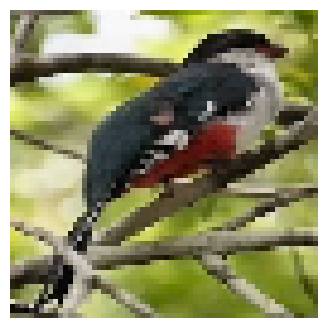

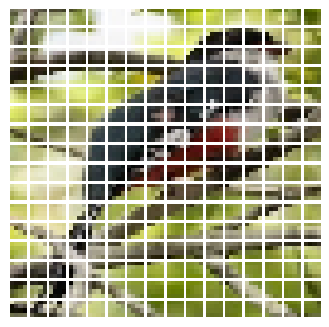

In [49]:
plt.figure(figsize=(4, 4))
image = train_images_rgb.next()[0][0]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")


In [56]:
#Do not perform augmentation to be consistent with the CNN model above

data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.Normalization(),
        tf.keras.layers.Resizing(image_size, image_size)
    ],
    name="data_augmentation",
)

In [57]:
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = tf.keras.layers.Dense(units=projection_dim)
        self.position_embedding = tf.keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

def create_vit_classifier():
    inputs = tf.keras.layers.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = tf.keras.layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = tf.keras.layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = tf.keras.layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = tf.keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = tf.keras.layers.Flatten()(representation)
    representation = tf.keras.layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = tf.keras.layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = tf.keras.Model(inputs=inputs, outputs=logits)
    return model


In [58]:
def run_experiment(model):
    optimizer = tf.optimizers.Adam(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.TopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    checkpoint_filepath = "/tmp/checkpoint"

    history = model.fit(
        train_images_rgb,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=val_images_rgb
    )

    _, accuracy, top_5_accuracy = model.evaluate(test_images_rgb)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history


vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)

Epoch 1/5
324/324 [==============================] - 1040s 3s/step - loss: 6.2502 - accuracy: 0.0028 - top-5-accuracy: 0.0131 - val_loss: 6.2447 - val_accuracy: 0.0019 - val_top-5-accuracy: 0.0097
Epoch 2/5
324/324 [==============================] - 1027s 3s/step - loss: 6.2405 - accuracy: 0.0032 - top-5-accuracy: 0.0135 - val_loss: 6.2465 - val_accuracy: 0.0019 - val_top-5-accuracy: 0.0097
Epoch 3/5
324/324 [==============================] - 1094s 3s/step - loss: 6.2389 - accuracy: 0.0031 - top-5-accuracy: 0.0141 - val_loss: 6.2484 - val_accuracy: 0.0019 - val_top-5-accuracy: 0.0097
Epoch 4/5
324/324 [==============================] - 1064s 3s/step - loss: 6.2384 - accuracy: 0.0032 - top-5-accuracy: 0.0145 - val_loss: 6.2491 - val_accuracy: 0.0019 - val_top-5-accuracy: 0.0097
Epoch 5/5
11/11 [==============================] - 16s 1s/step - loss: 6.2503 - accuracy: 0.0019 - top-5-accuracy: 0.0097
Test accuracy: 0.19%
Test top 5 accuracy: 0.97%


In [65]:
import tensorflow_addons as tfa
from vit_keras import vit, utils

In [74]:
vit_model = vit.vit_b32(
        image_size = (64,64),
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 515)

c:\Users\anekl\Documents\Python Files\College\CSC 7760\.venv\Lib\site-packages\vit_keras\utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 2, 2
  warnings.warn(


In [75]:
vit_model.trainable = False
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(100, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(515, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87420672  
                                                                 
 flatten_15 (Flatten)        (None, 768)               0         
                                                                 
 batch_normalization_8 (Batc  (None, 768)              3072      
 hNormalization)                                                 
                                                                 
 dense_176 (Dense)           (None, 100)               76900     
                                                                 
 batch_normalization_9 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dense_177 (Dense)           (None, 515)        

In [77]:
model.compile(
        optimizer=tf.optimizers.legacy.Adam(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=[
            tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.TopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )
model.fit(train_images_rgb, validation_data=val_images_rgb, epochs = 5)

Epoch 1/5
324/324 [==============================] - 495s 1s/step - loss: 5.9343 - accuracy: 0.0184 - top-5-accuracy: 0.0621 - val_loss: 5.5055 - val_accuracy: 0.0482 - val_top-5-accuracy: 0.1278
Epoch 2/5
324/324 [==============================] - 466s 1s/step - loss: 5.3971 - accuracy: 0.0564 - top-5-accuracy: 0.1527 - val_loss: 5.1663 - val_accuracy: 0.0753 - val_top-5-accuracy: 0.1891
Epoch 3/5
324/324 [==============================] - 459s 1s/step - loss: 5.1253 - accuracy: 0.0821 - top-5-accuracy: 0.2040 - val_loss: 4.9884 - val_accuracy: 0.0955 - val_top-5-accuracy: 0.2283
Epoch 4/5
324/324 [==============================] - 461s 1s/step - loss: 4.9621 - accuracy: 0.0984 - top-5-accuracy: 0.2332 - val_loss: 4.9073 - val_accuracy: 0.1049 - val_top-5-accuracy: 0.2505
Epoch 5/5
324/324 [==============================] - 459s 1s/step - loss: 4.8431 - accuracy: 0.1102 - top-5-accuracy: 0.2545 - val_loss: 4.8538 - val_accuracy: 0.1122 - val_top-5-accuracy: 0.2559


In [79]:
model.evaluate(test_images_rgb)

11/11 [==============================] - 16s 1s/step - loss: 4.7343 - accuracy: 0.1200 - top-5-accuracy: 0.2738


[4.73431396484375, 0.11999999731779099, 0.27378639578819275]

In [39]:
vit_classifier.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 data_augmentation (Sequential)  (None, 64, 64, 3)   7           ['input_7[0][0]']                
                                                                                                  
 patches_9 (Patches)            (None, None, 48)     0           ['data_augmentation[0][0]']      
                                                                                                  
 patch_encoder_6 (PatchEncoder)  (None, 256, 64)     19520       ['patches_9[0][0]']              
                                                                                            

In [59]:
vit_classifier.save("Models/ViT_64_64")

INFO:tensorflow:Assets written to: Models/ViT_64_64\assets


INFO:tensorflow:Assets written to: Models/ViT_64_64\assets


In [78]:
model.save("Models/ViT_B32_Transfer")

INFO:tensorflow:Assets written to: Models/ViT_B32_Transfer\assets


INFO:tensorflow:Assets written to: Models/ViT_B32_Transfer\assets
